# Previous Notebooks Summary: 
---
1. Module 2 - basic Python
2. Module 3 - more advanced Python 

We are now moving on to Module 4 where we will discuss a variety of important libraries especially for biology.

# Overview
---
The rest of this notebook gives an overview of the important libraries, including the ones that we will discuss in more depth with their own dedicated notebooks. 

Although, I often say (or imply) that Python is slow, I have found an [excellent blog post](https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/) about why that is the case. You don't have to read this post - unless you are interested! - but it does reference the fact that **lists in Python are objects that points to other objects and uses dynamic typing. This fact is why NumPy arrays are so much faster than Python lists - because they use memory waaaaay more efficiently - and why **many many** libraries are built on the functionality of NumPy.  

We are going to explore important libraries in Python that approximate much of the R programming language functionality in data analysis and that are important for "Data Science". 

There are seven-ish major libraries that data analysts' (and, particularly, biologists) use. We will have a brief overview of all of them and then we will explore four of them - NumPy, Pandas, Biopython, SQLite- in a bit more depth. 

**You will need to download these packages!**

conda install numpy
conda install pandas
conda install sqlite
etc...


# ** Important Libraries **
---
1. **NumPy**
2. SciPy - really an offshoot of NumPy
3. Statsmodels
4. MatPlotLib and Plotly (and Plotly_express)
5. **PANDAS**
6. **biopython**
7. **SQLite** (I won't argue that this is an important package in the sense that NumPy and Pandas are important but it is a much easier way to understand SQLite than downloading an entirely new environment etc so let's say that it be important to **us**)
8. [Bohek](https://docs.bokeh.org/en/latest/index.html) - library that **creates interactive plots/displays for web sites**
    * Note: I am adding this library into the list that you should know about, but I am just beginning to learn about how to use it myself! The joy of programming is that you are constantly learning about new packages that make hard things easier and more effective. 
9. Plotly
10. [scikit-bio](https://scikit.bio/index.html) - I didn't include a summary of this library, but it is incredible for bioinformatics. It is quite similar in functions to bioconductor (for R).


Note: There are conventional ways to import these datasets. You could, of course, call them anything you wish (including *) but it isn't a good idea because the namespaces of these libraries are SO HUGE that methods will get easily confused. As a beginner, it is a good idea to follow conventions!

# 1. Intro to NumPy
---
NumPy is a Python package. It stands for 'Numerical Python' and, unsurprisingly, it is a library consisting of all the things (data types and routines) that you might need for scientific computing. It contains "list-like" objects that are highly optimized and work like multidimensional array objects, matrices and data tables which is how scientists tend to think data should look: homogeneous. The tables that are produced by NumPy have tuples as indices....just so you know. It is, after all, kinda cool that someone built a more complex data type out of the data types that we have already seen. 

NumPy's array objects are considered the **lingua franca** of data 'exchange' since it 'talks' to C, C++ and Fortran and so it is often used along with packages like SciPy (Scientific Python) and MatPlotLib (plotting library) and PANDAS.  We'll look at those other packages, as well, but since NumPy was adopted first - and the other packages were often optimized with respect to NumPy - it makes sense to begin with it.

We will discuss NumPy details in Module_4A.
 

#  2. SciPy
---
This library shares a lot of common functions with NumPy. However, it is also full of specialized functions and algorithms so there might come a time in the future when you need to access a function from it. 

SciPy has some specialized and particularly efficient ways of handling large matrices and arrays (but, for this course, we don't handle arrays that are large enough to justify efficiency). There are modules that include `SciPy.special` which covers highly used functions in mathematical physics. `SciPy.integrate` contains a number of useful functions for dealing with ordinary differential equations. The `scipy.optimization` module contains functions that optimize very specialized functions as well as some more generally used functions like least-squares minimization. Then there are many more including tools for signal processing and all that good stuff!

Lastly, there are linear algebra tools for specialized matrix decomposition and STATISTICS!

<br>

__Tl;dr:__ SciPy is most often used for basic statistics and distribution fitting and image processing (which is increasingly important in biology!). The module for image processing is [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage). 

<br>

You can import this library in the usual way: 

        from scipy import stats

I have included some out-of-the-box examples from the package tutorial below so you can get a sense of their functionality. 

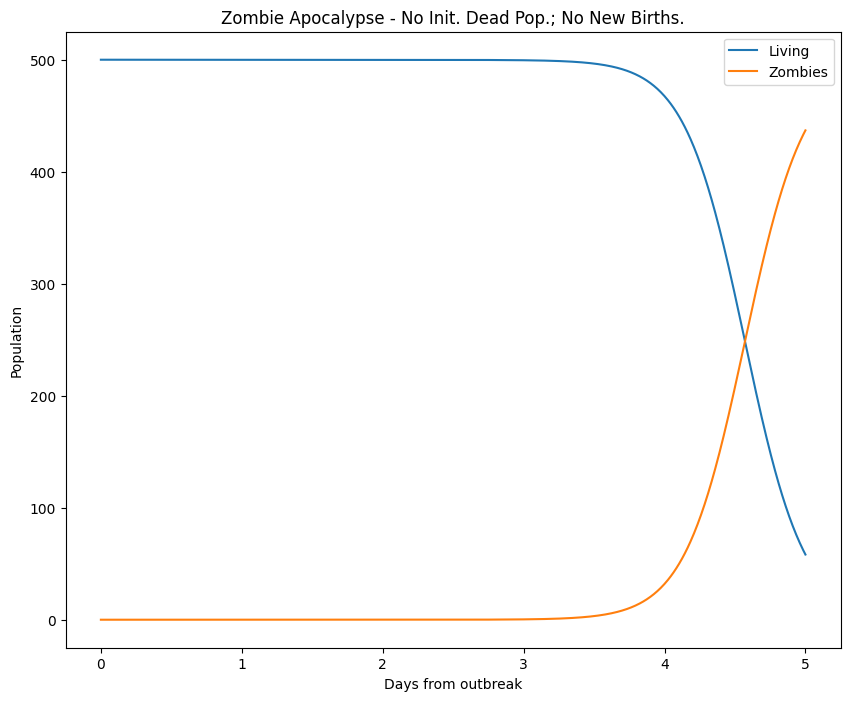

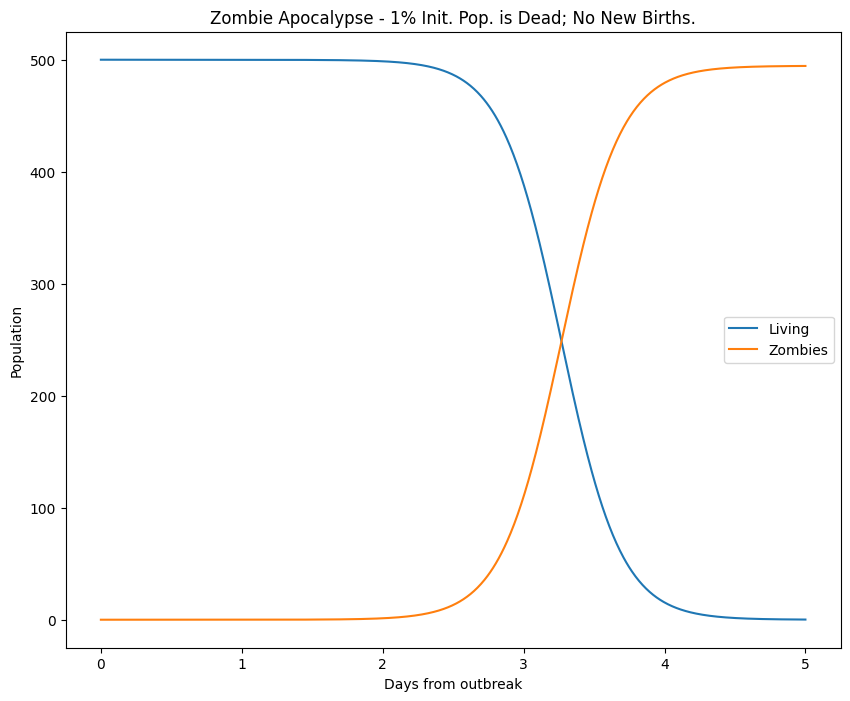

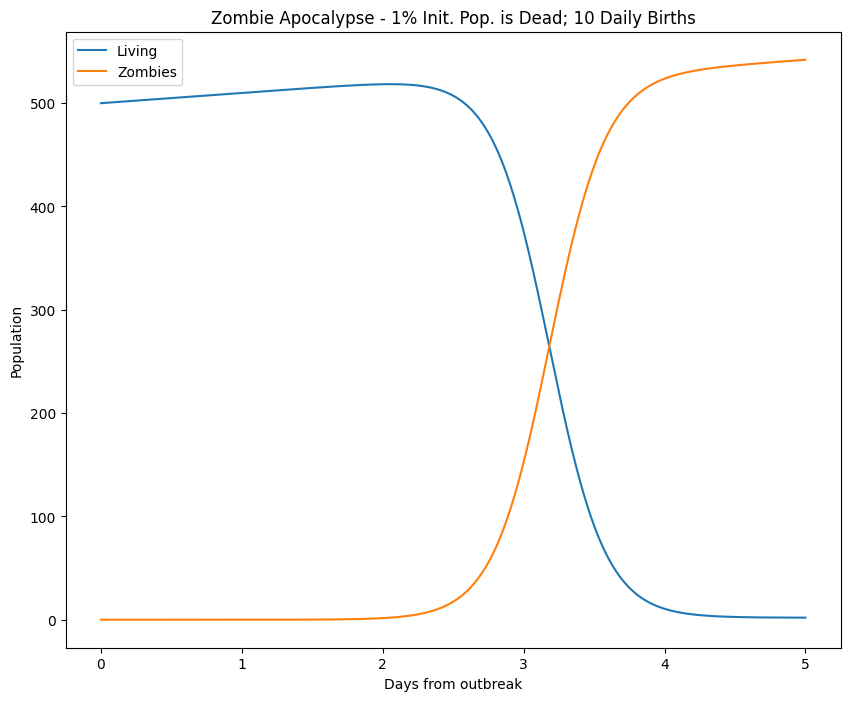

In [1]:
# There are a couple of dramatic examples from the scipy cookbook
# - most libraries have accessible 'cookbooks'
# that are WAAAAAY more sophisticated than anything we will need to do in this class 
# but I wanted to steal a couple to demonstrate to you the kinds of really cool analysis
# you can do with slightly 'dry' topics like 
# ordinary differential equations.
# ----------------------------------------------------
# We can also see a demo of differential equations here (Modeling the Zombie Apocalypse):
#https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html
# -----------------------------------
# There is also a notebook on another important ODE in biology ---> Lotka-Volterra Models (predator-prey
# equilibriums) here: 
# https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
# -----------------------------------
# zombie apocalypse modeling example

# first bring in the stack of libraries with their conventional aliases
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# note -- you might need to pip install scikit-bio
from skbio import DNA

plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurrect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid - NOTICE that we are using creating an array of 1000 time points 
                        # that are evenly spaced between 0 and 5. 

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)

### **A Note on Graphing:**
Here is a wonderful website that helps you choose which statistical graph to use to visualize your data:  https://www.data-to-viz.com/

We will investigate this website more during our Visualization Module, but you can visit it before then (and I mention it a lot because of its incomparable functionality). 

It includes code to produce particular graphs for both **R** and **Python**!

## Basic Statistics in SciPy

In [14]:
# you can also do basic statistics in SciPy - although it is easier to use StatsModels
# MANY of the following examples, are taken from the SciPy website: 
# https://www.tutorialspoint.com/scipy/scipy_stats.htm
#1. generate random pulls from particular distributions: 
from scipy import stats 
import numpy as np
norm_exam = stats.norm.cdf(np.array([1,-1., 0, 1, 3, 4, -2, 6]))
print(norm_exam)
#descriptive statistics
stats.describe(norm_exam)
# You can also conduct statistical tests such as t-test: 
# rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
# print(stats.ttest_1samp(rvs,5.0))

[0.84134475 0.15865525 0.5        0.84134475 0.9986501  0.99996833
 0.02275013 1.        ]


DescribeResult(nobs=8, minmax=(0.022750131948179195, 0.9999999990134123), mean=0.6703391634695839, variance=0.156258993090978, skewness=-0.7255711873700605, kurtosis=-1.1129849405348962)

## Skimage
Note: skimage is an image processing library that is often part of the SciPy ecoystem (although, like most of these libraries, it is built on NumPy). If you're interested in learning more, check out this straightforward [skimage tutorial](https://www.analyticsvidhya.com/blog/2019/09/9-powerful-tricks-for-working-image-data-skimage-python/).

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)
1
96.85551602035204
125


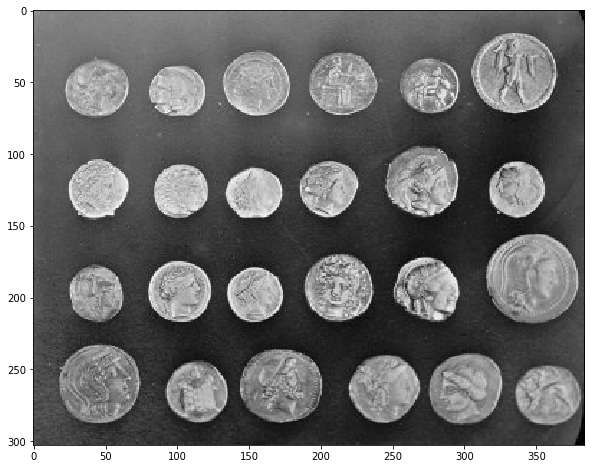

In [27]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
# the shape is the dimensions and items in each dimension
print('shape:', coins.shape)
print(coins.min())
#mean image intensity 
print(coins.mean())
#get the value of the pixel at the 10th rowand 20th column
print(coins[10,20])

plt.imshow(coins, cmap='gray')
# -----------------------------------

Shape: (300, 451, 3)
Values min/max: 0 231


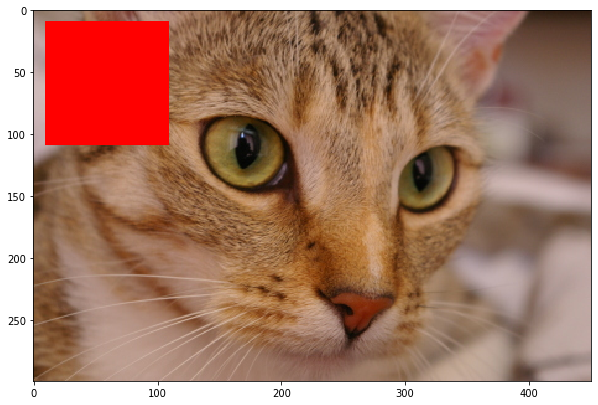

In [16]:
# you can also do color images: 3D arrays where the 3rd dimension is red,green,blue
# this is from a built in data set in skimage
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat)
#---------------------------------
# take slices of the cat image and set them to be the color RED
# this isn't interesting, but you can probably already see that 
# there are much more interesting possibilities with this type of tool!
#----------------------------------------------------
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape:  (512, 512, 3)


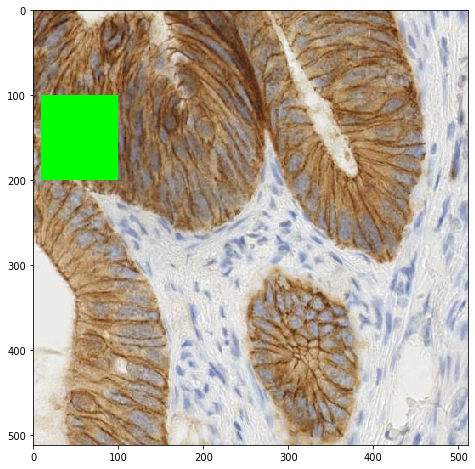

In [28]:
# IMMEDIATELY NOTICE THAT - despite being an image of cells- THIS HAS IMPLICATIONS IN 
# RECIST (RESPONSE EVALUATION CRITERIA IN SOLID TUMORS) -
# A TUMOR CLASSIFICATION SYSTEM THAT RELIES ON CALCULATING THE VOLUME OF TUMORS BEFORE AND
# AFTER TREATMENT AND DETERMINING WHETHER OR NOT THEY HAVE SHRUNK AFTER TREATMENT.
# -----------------------------------
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
histo = data.immunohistochemistry()
print("Shape: ", histo.shape)
plt.imshow(histo)
histo[100:200,10:100,:]=[0,255,0]
plt.imshow(histo)

# 3. Statsmodels and Plotly
---
This is another package that often relies on the array ability of NumPy and the data frame functionality of Pandas. It provides a way of running statistical analysis using formulas like the ones used by R but with Python instead. Basically, it is used for statistical modeling. 

We will look at a built in data set that tracks breast cancer in various countries. There are 301 observations and two variables: population and count of breast cancer occurences in a time frame. You can see the other built in data sets that you can play with here: http://www.statsmodels.org/stable/datasets/index.html

        import statsmodels.api as sm

We will also look at [plotly](https://medium.com/plotly/introducing-plotly-express-808df010143d), a new library that is based on ggplot2 'tidyverse' ideals.

You can download the package into the Anaconda package manager by following these instructions: https://anaconda.org/plotly/plotly_express

In [29]:
import statsmodels.api as sm
# As is the case with most of the libraries that we will look at today, statsmodels comes with 
# its own data sets to play with! They are found in the datasets module. 
# Interestingly, you can also access the built in R datasets by using the .get_rdataset function of this module: 
#dataset_iris = sm.datasets.get_rdataset(dataname='iris', package='datasets')
# https://www.statsmodels.org/dev/datasets/index.html

# note: the load_pandas() function is part of the datasets that are provided in the above 
# repository of data sets. 
cancer_data = sm.datasets.cancer.load_pandas()
# let's see what is in this data set using the .data.head() method
cancer_data.data.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


The most powerful aspect of the R programming language comes down to: 
1. efficiency (vector-ish language)
2. easy input/output
3. straight forward statistical analysis and visualization

* __R is still the programming language of statistical analysis. Will that still be true in five years? Eh, I dunno...but it will still be a good idea to understand basic R.__

* We can see that the scipy library, supported by the other libraries that we tend to use together, can mostly replace R. **This is a fairly big deal.**

* Statsmodels even has an internal package called Patsy which allows you to create formulae that act like the ones in R: http://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html


In [19]:
import scipy.stats as stats
import statsmodels.api as sm
#the following libary automatically fits a line of best fit to your data so its
# slightly different than statsmodels.api library
import statsmodels.formula.api as smf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
# boring array
x = [1, 2, 3, 4, 5]
# describe returns the descriptive traits: min, max, variance, skewness,kurtosis
# if we had a pandas dataframe, we could use describe() on particular columns
# to get the same summary descriptive statistics
print("using stats.describe method: ")
print(stats.describe(x))

# we will talk about pandas data manipulation soon but here is small example: 
data = pd.DataFrame([[1, 2, 3.5], [2, 2.4, 3.1], [3, 1.8, 2.5]], columns=['a', 'b', 'c'])
print(data)
print("Now describe the data set: ")
print(data.describe())
print("Now for t tests!")
print("~~~~~~~~~~~~~~~~")
# we can run basic statistical tests: t-tests, one sample, two sample
# let's create two data sets
x1 = np.random.randn(100, 1)
x2 = np.random.randn(100, 1)
# one sample t test. Compare x1 to 0  - it shouldn't be different since it was simuated using a normal disribution with mean 0
# note that you can pull out the pval and the tstat in one line. this is different from R - in case you have used that.
tstat, pval = stats.ttest_1samp(x1, 0)
print("Comparison of the mean of x1 to 0.\nT-statistic = %s; P-value = %s." % (tstat, pval))
# one sample t test. Compare x1 to 1
tstat, pval = stats.ttest_1samp(x1, 1)
print("Comparison of the mean of x1 to 5.\nT-statistic = %s; P-value = %s." % (tstat, pval))
print("Here is a two sample t test")
# compare distribution x1 and x2 -- they shouldn't be super different!
tstat, pval = stats.ttest_ind(x1, x2)
print("Comparison of the means of x1 and x2.\nT-statistic = %s; P-value = %s." % (tstat, pval))
# we can generate random distributions, as well! Here we will generate 50 data points from a normal distribution
# with mean =4 and variance of 2. the function is for a standardized normal distirbution so you need to use loc to change mean
# and scale to change the sd
print("~~~~~~~~~")
random_numbers = stats.norm.rvs(loc=4,scale=2, size=50)
print(random_numbers)
# there are all kinds of other linear models, including ANOVA, that can done in this library

using stats.describe method: 
DescribeResult(nobs=5, minmax=(1, 5), mean=3.0, variance=2.5, skewness=0.0, kurtosis=-1.3)
   a    b    c
0  1  2.0  3.5
1  2  2.4  3.1
2  3  1.8  2.5
Now describe the data set: 
         a         b         c
count  3.0  3.000000  3.000000
mean   2.0  2.066667  3.033333
std    1.0  0.305505  0.503322
min    1.0  1.800000  2.500000
25%    1.5  1.900000  2.800000
50%    2.0  2.000000  3.100000
75%    2.5  2.200000  3.300000
max    3.0  2.400000  3.500000
Now for t tests!
~~~~~~~~~~~~~~~~
Comparison of the mean of x1 to 0.
T-statistic = [-0.18841441]; P-value = [0.85093749].
Comparison of the mean of x1 to 5.
T-statistic = [-10.64055362]; P-value = [4.40202523e-18].
Here is a two sample t test
Comparison of the means of x1 and x2.
T-statistic = [-0.50886919]; P-value = [0.61141049].
~~~~~~~~~
[ 4.78730711  2.85013806  5.60918911  1.34881311  5.16930941  3.34668147
  2.72535473  2.15180566  3.28739683  3.3229957   0.05570525  7.57475593
  4.73024685  4.443869

In [20]:
# And now to see some of the NEATO visualizations possible with plotly_express
# here is a walk through of the following commands:
# https://nbviewer.jupyter.org/github/plotly/plotly_express/blob/gh-pages/walkthrough.ipynb

# 4. MatPlotLib
---
https://matplotlib.org/users/intro.html

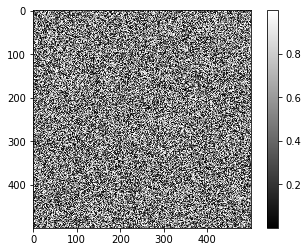

In [30]:
# using scipy image library to see that images can be summarized and accessed using numpy
# NOTICE "THE STACK" of imported libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# make a random image and translate it to greyscale using numpy 
# (translates the image into a 2-D plot)
random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray')
plt.colorbar()
# -----------------------------------
# you can use a publicly available dataset of images - from skimage - to do the same thing
# http://scikit-image.org/docs/dev/api/skimage.data.html#skimage.data.immunohistochemistry

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]


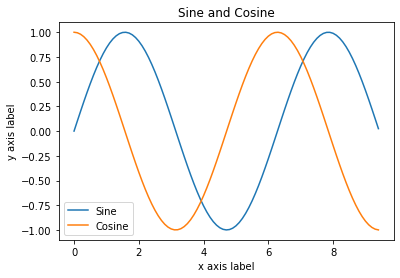

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
print(x)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

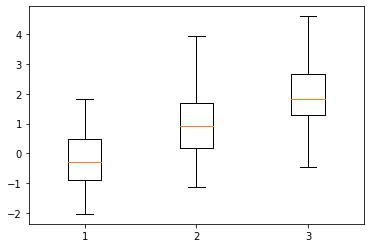

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)

ax.boxplot([x1,x2,x3])
plt.show()

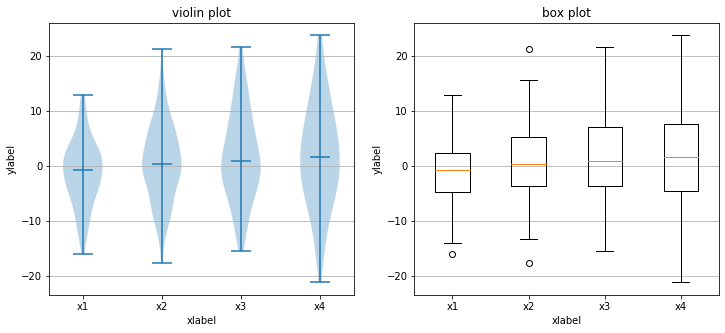

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#provides a mathlab-like plotting experience with numpy
#more information about parameters can be found here:
# http://matplotlib.org/api/pyplot_api.html
# you can download this package using the installer at http://matplotlib.org/index.html
#for macs, you will need to update your pip  - a package manager - and then you can just
# use the following command pip install matplotlib
# I found some information on windows on youtube as well.

#plt.plot([1,2,10])
#plt.show()

#an example comparing boxplots to violin plots found
#http://matplotlib.org/examples/statistics/boxplot_vs_violin_demo.html
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
#generate some random test data
all_data=[np.random.normal(0, std, 100) for std in range(6, 10)]
#print("*"*20)
#in case you want to check your randomly generated numbers
#print(all_data)
# plot violin plot
axes[0].violinplot(all_data,showmeans=False,showmedians=True)
axes[0].set_title("violin plot")

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title("box plot")

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel("xlabel")
    ax.set_ylabel("ylabel")

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

# 5. PANDAS
---
(PANDAS is covered in Module 4A, this is just a summary.)

__Data manipulation and cleaning__

* We often want to use data that is heterogeneous - a fancy word for data that is of different types. The most familiar type of heterogenous data for most people is an excel spreadsheet. In python, we have already seen tuples which allows for heterogeneous data.

* used most often for "data munging" which really means creating clean, easily used data sets

* two workhorse structures are: Series and DataFrame

* we can run basic plots using pandas methods

* Subsetting and grouping are probably the most powerful aspects of PANDAS.

__[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)__
* one-dimensional array-like object that contains a sequence of values and an associated array of data labels (index) - the index means that when you print out a series object, it will display the index on the left and the actual associated values in the series on the right.
* you can also think about Series as a fix-length, ordered dictionary. In fact, you can convert dictionaries into Series. 


__[DataFrames](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)__
* DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.
* there are some rules about how to set up data frames that follow Hadley Wickham's conventions (He is am important fellow in the R world - he created ggplot and is one of the main innovators behind RStudio). 
* There are several ways to create a DataFrame. One way (like the above example with Series) is to use a dictionary. 

In [ ]:
#Here is an example of PCA that combines a bunch of the above libraries: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#the following magic command allows you to render the plot in the jupyter notebook and save it. 
%matplotlib inline 

# Here we are using one built-in dataset of scikit learn module - you'll see that we use this libary a lot in 
# conjuntion with the other libraries
from sklearn.datasets import load_breast_cancer 
 
# Importing standardscalar module. The importance of standardizing your data with machine learning:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler 
# Importing the actual PCA methods from sklearn.decomposition package
from sklearn.decomposition import PCA

# the data set is here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
# bring it into our memory
cancer = load_breast_cancer() 
#you don't want to print off this entire dataset. It is huge and a bit complex. We can turn it into a dataframe though!
#print(cancer)  
# creating dataframe: 'data' - the data to learn ; 'feature_names'
# IT IS COMMON TO CALL THE OBJECT IN PANDAS df. 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
  
# checking head of dataframe to see what the first 5 rows look like.
print("Here is a peek at the dataset:")
print(df.head())
print("How many dimensions - rows and columns - does this data set have?")
# we use attributes - not methods - to answer this kind of question
print(df.shape)
print(df.columns)
# ________________________________________________________
# this is the standardscalar method from sklearn: 
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
# we store the standardized mean and variances into the scalar variable
# the next few commands are a *well described pipeline* in sklearns. We won't focus on too many details but
# if you are interested there is enough information included - weblinks - to delve deeper!
# ________________________________________________________
print("fitting the scaled data")
scalar = StandardScaler().fit(df) 
print(scalar)
# we can get information like the scaled means but calling scalar.mean_
print(scalar.mean_)
# fitting the dataframe
print("~~~~~~~~~~~~~")
scaled_data = scalar.transform(df) 
print(scaled_data)
  
# Let's say, components = 2 since we just want a 2-dimensional plot. We could use other built in methods
# to find the MLE and to give us the number of PCA drivers.
pca = PCA(n_components = 2)
# the fit is 'learning' about the explained variance that is accounted for by the two major components
pca.fit(scaled_data)

# We can print out some REALLY COOL attributed of the pca object now: 
print("How many components are there?")
print(pca.components_)
print("What percentage of variation can be explained by the two principle components?")
print(pca.explained_variance_)
# in this case it isn't much and we would probably need to use higher dimensions to explain the roughly 80% 
# variation that we usually want to obtain with PCA. 
# in this application of PCA, we want to reduce dimensionality so we tranform it
x_pca = pca.transform(scaled_data) 
print(x_pca.shape)
# now that we have reduced the number of columns from 30 --> 2 (which is a linear combo of the columsn),
# we can plot out our transformed data 
# breaking down what this is plotting: all rows and columns 0 and 1 of pca transformed data set.  
# c and cmap are color arguments that assign different colors to the two principle components
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target']) 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 

# 6. BioPython
---
You *MIGHT* notice that when you open up the [Biopython tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html) that much of the first 10% of the Biopython methods involves manipulating nucleotide sequences in similar ways to what you saw on most of our early example problems!


In [ ]:
# Biopython
# Great examples at kaggle.com:
# https://www.kaggle.com/mylesoneill/getting-started-with-biopython
# And, of course, the Biopython people: 
# http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc6
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq
Seq('AGTACACTGGT')
print(my_seq)
#print(my_seq.alphabet)

# 7. SQLite3 
---
Easy way to set up and retrieve database elements. It emulates much of the functionality and logic of SQLite (which, in turn, is based on the logic of SQL). This is a bit of niche package. If you are someone who is using large databases, then you might end up using this a lot. You will need to read about primary keys, foreign keys and all the other pieces SQL-specific philosophy (every table has a [primary key](https://www.w3schools.com/sql/sql_primarykey.asp) and tables within a database are linked via their foreign keys --- which are the primary keys in other tables). However, some of the functionality and [syntax](https://www.w3schools.com/sql/sql_syntax.asp) of SQLite3/SQL/SQLite commands can also be replicated by pandas. 

So, in the following example, I will show you how you can use the sqlite3 package to set up a database (just as you would with 'real' SQL) and then in the cell below it, I will show you how to use the same type of SQL 'queries' with a method in the pandas package. 
 

In [1]:
import sqlite3
from datetime import date

# Connect to database. Convention uses conn and cursor for these variables
conn = sqlite3.connect("mouse_study.db")
cursor = conn.cursor()

# Create tables
# first table is 'mice'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS mice (
        mouse_id TEXT PRIMARY KEY,
        strain TEXT NOT NULL,
        sex TEXT CHECK(sex IN ('M', 'F')),
        group_name TEXT NOT NULL  -- e.g., "Control", "Drug A"
    )
''')
# second table in the database is "weight_tracking"
# Notice how there is a column in each of the tables that is designated as primary key
# and there is also a foreign key in the second table that links the two tables
cursor.execute('''
    CREATE TABLE IF NOT EXISTS weight_tracking (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        mouse_id TEXT,
        weight_grams REAL,
        recorded_date DATE,
        FOREIGN KEY(mouse_id) REFERENCES mice(mouse_id)
    )
''')

# Insert mouse metadata
mice = [
    ("M001", "C57BL/6", "F", "Control"),
    ("M002", "BALB/c", "M", "Drug A"),
    ("M003", "C57BL/6", "F", "Drug A")
]
cursor.executemany("INSERT OR IGNORE INTO mice VALUES (?, ?, ?, ?)", mice)

# Insert longitudinal weight data
weights = [
    ("M001", 18.5, "2025-05-01"),
    ("M001", 19.0, "2025-05-08"),
    ("M002", 21.2, "2025-05-01"),
    ("M002", 22.0, "2025-05-08"),
    ("M003", 19.7, "2025-05-01"),
    ("M003", 20.1, "2025-05-08")
]
cursor.executemany("INSERT INTO weight_tracking (mouse_id, weight_grams, recorded_date) VALUES (?, ?, ?)", weights)

conn.commit()


In [2]:
# This is how we would query the database -- it only has two tables, but is still useful as a demo
query = '''
SELECT mice.mouse_id, mice.strain, mice.group_name, weight_tracking.weight_grams, weight_tracking.recorded_date
FROM mice
JOIN weight_tracking ON mice.mouse_id = weight_tracking.mouse_id
WHERE mice.group_name = 'Drug A' AND weight_tracking.recorded_date > '2025-05-03'
'''

cursor.execute(query)
for row in cursor.fetchall():
    print(row)

conn.close()


('M002', 'BALB/c', 'Drug A', 22.0, '2025-05-08')
('M003', 'C57BL/6', 'Drug A', 20.1, '2025-05-08')


In [1]:
# replicate the same query via pandas
import pandas as pd
import sqlite3

# Reconnect to read via pandas
conn = sqlite3.connect("mouse_study.db")

# Load data into DataFrames
mice_df = pd.read_sql_query("SELECT * FROM mice", conn)
weights_df = pd.read_sql_query("SELECT * FROM weight_tracking", conn)

# Merge and filter
merged = pd.merge(weights_df, mice_df, on="mouse_id")
filtered = merged[
    (merged["group_name"] == "Drug A") &
    (pd.to_datetime(merged["recorded_date"]) > pd.to_datetime("2025-05-03"))
]

print(filtered[["mouse_id", "strain", "group_name", "weight_grams", "recorded_date"]])
conn.close()


  mouse_id   strain group_name  weight_grams recorded_date
3     M002   BALB/c     Drug A          22.0    2025-05-08
5     M003  C57BL/6     Drug A          20.1    2025-05-08


# 8. Scikit-bio
---
Powerful - especially for bioinformatics. https://scikit.bio/index.html

scikit-bio is a Python library for bioinformatics and computational biology, built on top of NumPy and SciPy. It provides robust tools for working with biological data types such as DNA/RNA/protein sequences, phylogenetic trees, and alignment data. It’s particularly useful for microbial ecology, genomics, and sequence analysis tasks. Unlike Biopython, scikit-bio emphasizes composability, speed, and modern API design.

In [2]:
from skbio import DNA

# Define a DNA sequence
sequence = DNA("ACGTACGTAGCTAGCTGACT", metadata={'id': 'gene1'})

# Reverse complement
rev_comp = sequence.reverse_complement()
print("Reverse Complement:", rev_comp)

# Transcription to RNA
rna = sequence.transcribe()
print("RNA Transcript:", rna)

# GC content
gc_content = sequence.gc_content()
print(f"GC Content: {gc_content:.2%}")


Reverse Complement: AGTCAGCTAGCTACGTACGT
RNA Transcript: ACGUACGUAGCUAGCUGACU
GC Content: 50.00%
